---
title: 在庫管理とは
format:
  html:
    code-fold: true
jupyter: python3
---

商店・工場・倉庫などで、原材料・部品・製品などを適切に管理することを**在庫管理**（Inventory Management）という。一般的に、在庫管理の目的は、顧客の需要を満たしつつ、在庫に関わる費用を最小化することである。

::: {.callout-note}
豊田自動車が提唱した**ジャストインタイム**（Just In Time, JIT）は、生産方式としてよく知られている。

JIT とは必要なものを、必要な時に、必要な量だけ生産することである。JIT の目的は、在庫を最小限に抑え、効率的な生産を実現することである。

アメリカの研究者らは、その生産方式を体系化し、**リーン生産方式**（Lean Manufacturing）という概念を提唱した。

- [トヨタ生産方式](https://global.toyota/jp/company/vision-and-philosophy/production-system/)

:::

在庫が多すぎると、保管費用がかかる。逆に、在庫が少なすぎると、欠品が発生し、顧客の需要を満たせなくなる。在庫管理は次の二つの問題を決定する。

1. どのくらいの量を発注するか？（発注量）
2. いつ発注するか？（発注時期）

科学的在庫管理（Scientific Inventory Management）では、これらの問題に答えるために、次の手順で在庫管理を行う。

1. 在庫システムを数学モデルとして定式化する。
2. 最適な発注量と発注時期を決定する。

## 在庫モデルの分類

在庫モデルは、次のような要素で分類される。

需要（demand）
: 需要が決定論的 (Deterministic) か確率的（Stochastic）か。

観測（review）
: 在庫量を連続観測 (Continuous Review) するか、周期観測 (Periodic Review) するか。連続観測の場合、在庫量が連続的に観測でき、いつでも発注が可能である。周期観測の場合、一定の期間（例えば1週間）ごとに在庫量を観測する。

リードタイム（lead time）
: 発注から納品までの期間。調達期間とも呼ばれる。リードタイムが決定論的か確率的か。また、リードタイムが0かどうか。在庫モデルを単純化するために、リードタイムを0とし、発注から納品までの期間を無視することもある。

バックオーダー（backorder）
: バックオーダーが許容されるかどうか。需要が在庫を上回った場合、バックオーダーが許容されると、欠品が発生しても、後で需要を満たすことができる。バックオーダーが許容されない場合、欠品が発生すると、上回った需要は失われ、機会損失が発生する。

計画期間（planning horizon）
: 単一期間 (Single Period) か、複数期間 (Multi Period) か、無限 (Infinite) か。

以下の表に、需要と観測に基づく、古典的な在庫モデルを示す。

|在庫モデル|需要|観測|
|--|--|--|
|EOQモデル|決定論的|連続観測|
|Wagner-Whitin|決定論的|周期観測|
|安全在庫|確率的|連続観測|
|新聞売り子問題|確率的|周期観測|

## 在庫の費用

ここでは、在庫に関わる費用を紹介する。

発注費用（ordering cost）
: 発注量に関わらず、1回の発注にかかる費用。調達費用、固定費用（fixed cost）などとも呼ばれる。通常、1回の発注にかかる費用を $K$ とする。

購入費用（purchase cost）
: 商品を購入するためにかかる費用。通常、単位あたりの購入費用を $c$ とする。

欠品費用（stockout cost）
: 需要が在庫を上回った場合に発生する費用。通常、単位あたりの欠品費用を $p$ とする。

保管費用（holding cost）
: 在庫を保管するためにかかる倉庫費用、保険費用、税金、機会費用など。通常、単位時間あたりの1単位あたりの保管費用を $h$ とする。

例えば、1日あたり1単位の在庫を保管するために、$h$ の費用がかかるとする。30日間、50単位の在庫を保管するための総保管費用は $30 \times 50 \times h = 1500h$ となる。下の図を見ると、保管費用は

$$
\text{面積} \times h = 1500h
$$

となることがわかる。

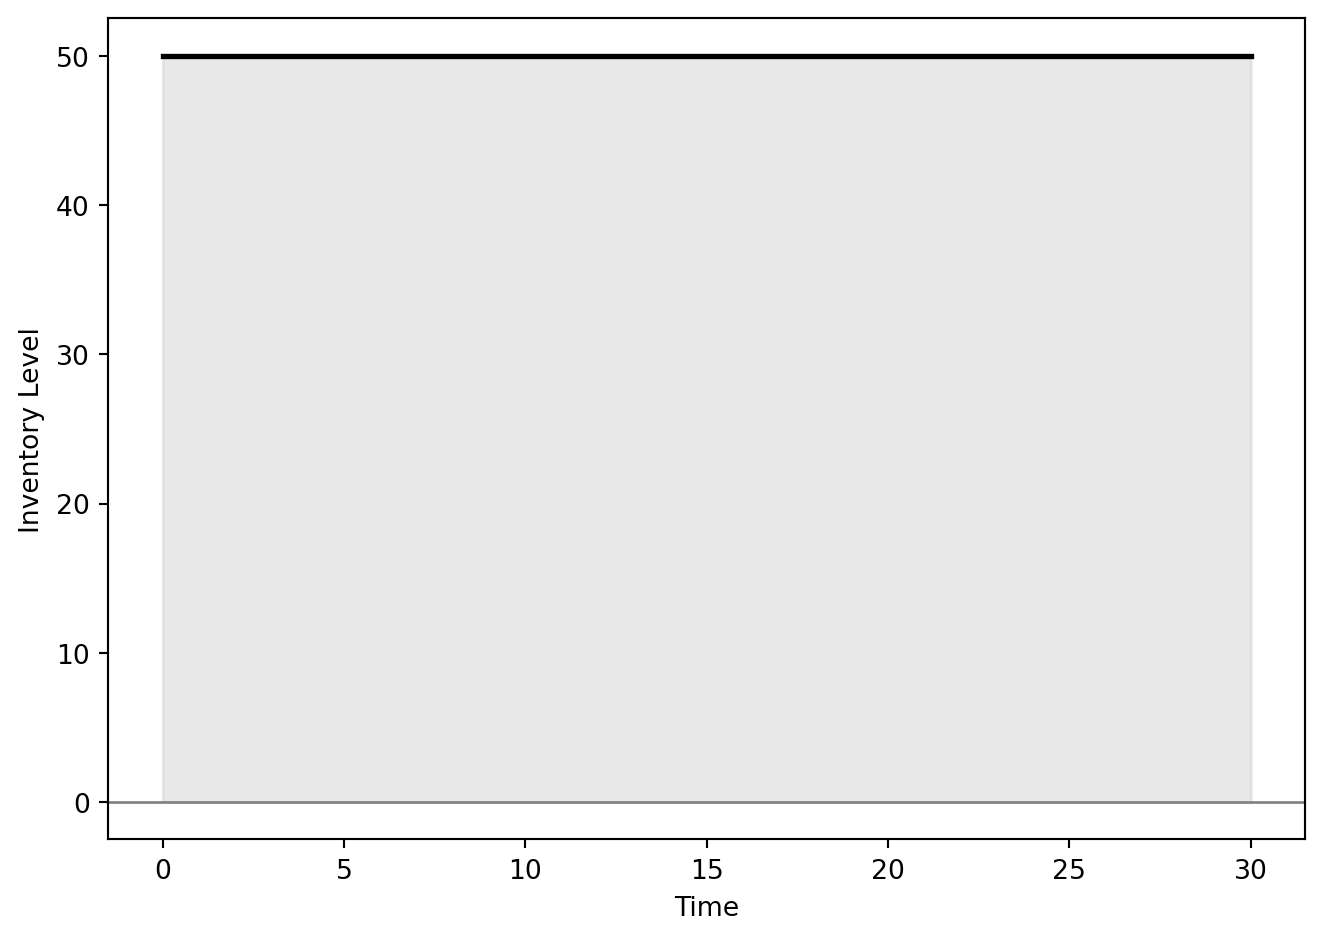

In [1]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 30, 1000)
inventory = np.full_like(t, 50)

# Plotting the inventory level
plt.fill_between(t, inventory, color="lightgray", alpha=0.5, label="Inventory Level")
plt.plot(t, inventory, label="Inventory Level", color="black", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Inventory Level")
plt.axhline(0, color="gray", linewidth=1)
plt.tight_layout()
plt.show()

一般的に、在庫量が定数ではなく、時間とともに変化する。例えば、発注量を $500$ とし、6 日間の在庫量を考える。

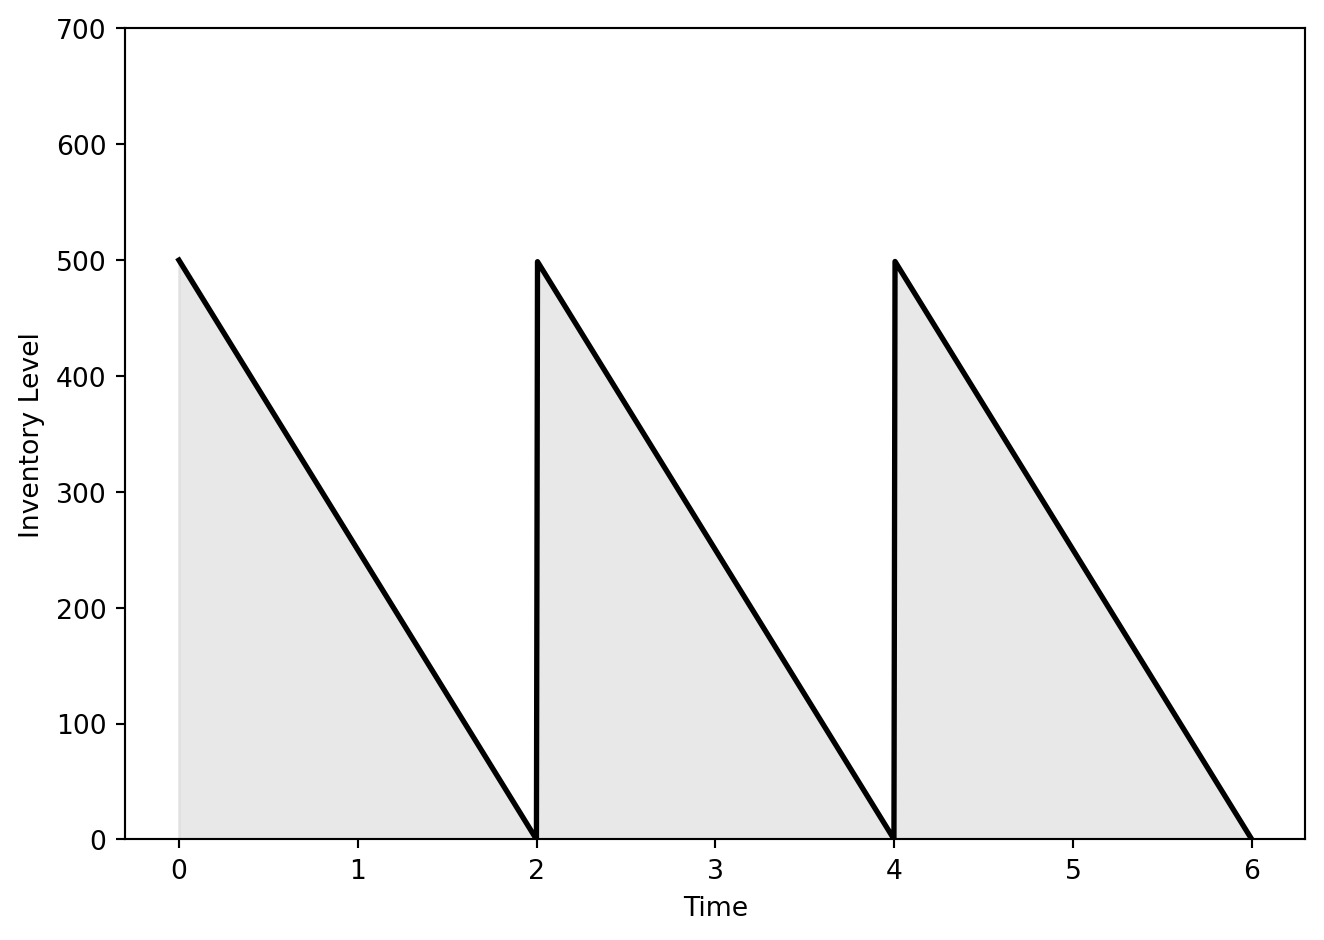

In [2]:
# Parameters
d = 250  # Demand rate
Q = 500  # Order quantity
T = Q / d  # Cycle length
t = np.linspace(0, 2.999 * T, 1000)

# Inventory level over time
inventory = np.maximum(0, Q - (d * t) % Q)

# Plotting the inventory level
plt.fill_between(t, inventory, color="lightgray", alpha=0.5, label="Inventory Level")
plt.plot(t, inventory, label="Inventory Level", color="black", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Inventory Level")
plt.axhline(0, color="gray", linewidth=1)
plt.ylim(bottom=0, top=Q + 200)
plt.tight_layout()
plt.show()

保管費用は次のように計算される。

$$
\frac{2 \times 500}{2} \times 3 \times h
$$
<!-- 
## Note

- [在庫最適化と安全在庫配置システム MESSA (MEta Safety Stock Allocation system)](https://scmopt.github.io/manual/03inventory.html)
- [Snyder (2023)](https://doi.org/10.1287/educ.2023.0256)はStockpylという在庫最適化とシミュレーションのためのPythonライブラリを開発した。

https://orsj.org/wp-content/or-archives50/pdf/bul/Vol.30_11_673.pdf


### 用語

| 英語                    | 日本語       |
| ----------------------- | ------------ |
| Economic Order Quantity | 経済的発注量 |
| Deterministic           | 決定論的     |
| Constant                | 一定         |
| Demand Rate             | 需要率       |
| Fixed Cost              | 固定費用     |
| Cycle                   | サイクル     |
| Inventory Level         | 在庫量       |
| Order Quantity          | 発注量       |

### 記号

|  記号  | 説明                   |
| :----: | :--------------------- |
|  $d$   | 単位時間あたりの需要量 |
|  $Q$   | 発注量                 |
|  $K$   | 発注費用               |
|  $h$   | 保管費用               |
|  $c$   | 購入単価               |
|  $T$   | サイクル期間           |
| $g(Q)$ | 平均コスト             | -->